### Figures for the 1d Lagrange interpolation simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tools import merge_pkl, read_field, create_subplots, fit_power_law

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

DATA_PATH = "data/"
SHOW_FIGURES = True

In [2]:
# Set parameter ranges
range_n = list(range(2, 25 + 1))
range_d = (
    list(range(2, 10)) + list(range(10, 100, 10)) + list(range(100, 1300 + 1, 100))
)
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_n = 25
fixed_d = 1300
fixed_t = 1e-14

# Load the data with respect to ranging the number of qubits n
params_n = {"n": range_n, "d": fixed_d, "t": fixed_t}
data_n = merge_pkl(params_n, name="lagrange_osc", path=DATA_PATH)

# Load the data with respect to ranging the order d
params_d = {"n": fixed_n, "d": range_d, "t": fixed_t}
data_d = merge_pkl(params_d, name="lagrange_osc", path=DATA_PATH)

# Load the data with respect to the parameter t
params_t = {"n": fixed_n, "d": fixed_d, "t": range_t}
data_t = merge_pkl(params_t, name="lagrange_osc", path=DATA_PATH)

# Load the data for Chebyshev
data_n_o = merge_pkl(params_n, name="chebyshev_1d_osc", path=DATA_PATH)
data_d_o = merge_pkl(params_d, name="chebyshev_1d_osc", path=DATA_PATH)
data_t_o = merge_pkl(params_t, name="chebyshev_1d_osc", path=DATA_PATH)

In [3]:
# Plot parameters
from tools import set_plot_parameters, STYLE_FIT_1, STYLE_FIT_2

set_plot_parameters()

# fmt: off
# Styles
STYLE_ITER = {"linestyle": "solid", "marker": None, "color": "tab:red"}
STYLE_O_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:red", "linewidth": 2.5}
STYLE_BASIC = {"linestyle": "dashed", "marker": None, "color": "tab:blue"}
STYLE_RR = {"linestyle": "dotted", "marker": None, "color": "tab:orange"}
STYLE_LOCAL_1 = {"linestyle": "dashdot", "marker": None, "color": "tab:green"}
STYLE_LOCAL_10 = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": None, "color": "tab:purple"}
STYLE_LOCAL_30 = {"linestyle": (0, (3, 1, 1, 1, 3, 1)), "marker": None, "color": "tab:brown"}

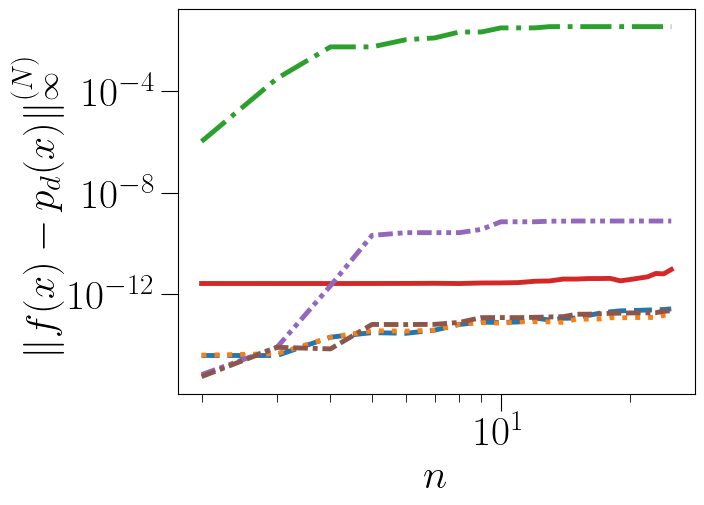

In [4]:
# fmt: off
def plot_norms_n(ax):
    ax.loglog(range_n, read_field(data_n_o, "error"), **STYLE_ITER)
    ax.loglog(range_n, read_field(data_n, "error_basic"), **STYLE_BASIC)
    ax.loglog(range_n, read_field(data_n, "error_rr"), **STYLE_RR)
    ax.loglog(range_n, read_field(data_n, "error_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_n, read_field(data_n, "error_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_n, read_field(data_n, "error_local_30"), **STYLE_LOCAL_30)
    

if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

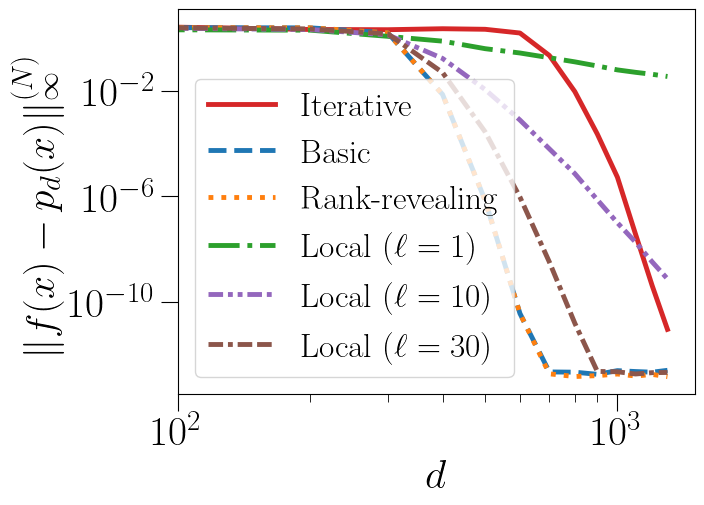

In [5]:
# fmt: off
def plot_norms_d(ax):
    ax.loglog(range_d, read_field(data_d_o, "error"), **STYLE_ITER, label="Iterative")
    ax.loglog(range_d, read_field(data_d, "error_basic"), **STYLE_BASIC, label="Basic")
    ax.loglog(range_d, read_field(data_d, "error_rr"), **STYLE_RR, label="Rank-revealing")
    ax.loglog(range_d, read_field(data_d, "error_local_1"), **STYLE_LOCAL_1, label=r"Local ($\ell=1$)")
    ax.loglog(range_d, read_field(data_d, "error_local_10"), **STYLE_LOCAL_10, label=r"Local ($\ell=10$)")
    ax.loglog(range_d, read_field(data_d, "error_local_30"), **STYLE_LOCAL_30, label=r"Local ($\ell=30$)")
    ax.set_xlim((100, 1500))
    ax.legend(fontsize=24)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_d(ax)
    ax.set_xlabel(r"$d$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")
    plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_260820/2672316374.py:9: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t, "error_basic"), label="\epsilon", style=STYLE_FIT_1)


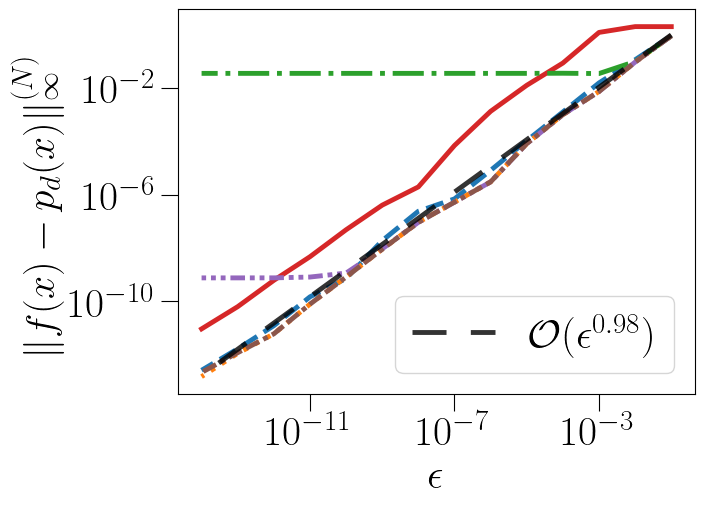

In [6]:
# fmt: off
def plot_norms_t(ax):
    ax.loglog(range_t, read_field(data_t_o, "error"), **STYLE_ITER)
    ax.loglog(range_t, read_field(data_t, "error_basic"), **STYLE_BASIC)
    ax.loglog(range_t, read_field(data_t, "error_rr"), **STYLE_RR)
    ax.loglog(range_t, read_field(data_t, "error_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_t, read_field(data_t, "error_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_t, read_field(data_t, "error_local_30"), **STYLE_LOCAL_30)
    fit_power_law(ax, range_t, read_field(data_t, "error_basic"), label="\epsilon", style=STYLE_FIT_1)
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")
    plt.show()

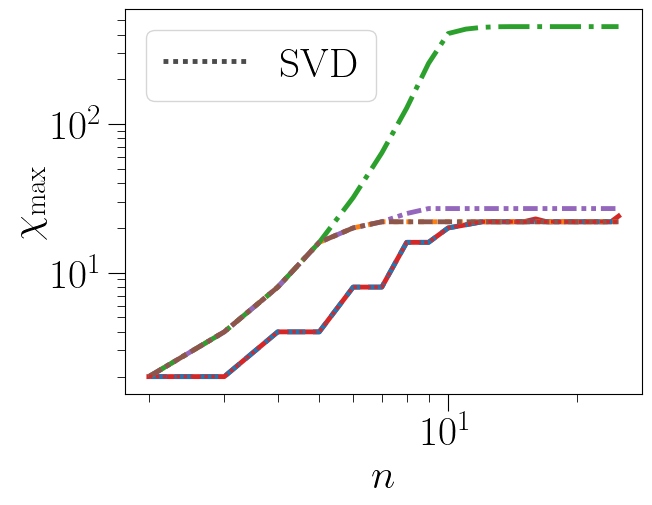

In [7]:
def plot_bonds_n(ax):
    ax.loglog(range_n, read_field(data_n_o, "maxbond"), **STYLE_ITER)
    ax.loglog(range_n, read_field(data_n_o, "maxbond_svd"), **STYLE_O_SVD, zorder=10)
    ax.loglog(range_n, read_field(data_n, "maxbond_basic"), **STYLE_BASIC)
    ax.loglog(range_n, read_field(data_n, "maxbond_rr"), **STYLE_RR)
    ax.loglog(range_n, read_field(data_n, "maxbond_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_n, read_field(data_n, "maxbond_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_n, read_field(data_n, "maxbond_local_30"), **STYLE_LOCAL_30)
    svd_line = plt.Line2D([], [], color="k", linestyle=(0, (1, 1)), alpha=0.7)
    ax.legend([svd_line], ["SVD"])


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

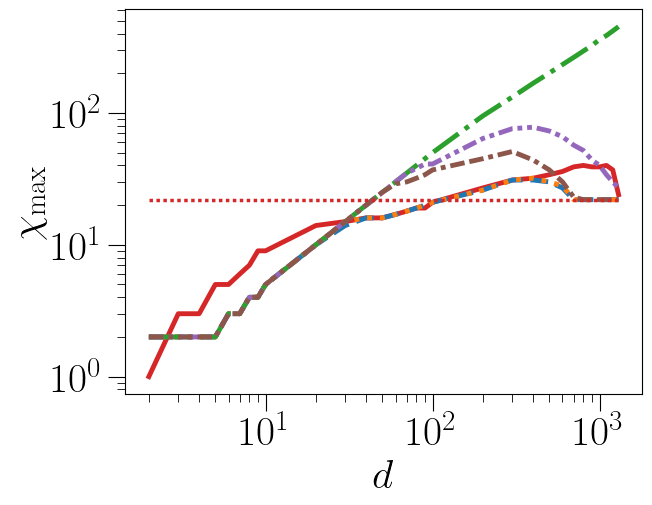

In [8]:
def plot_bonds_d(ax):
    ax.loglog(range_d, read_field(data_d_o, "maxbond"), **STYLE_ITER)
    ax.loglog(range_d, read_field(data_d_o, "maxbond_svd"), **STYLE_O_SVD, zorder=10)
    ax.loglog(range_d, read_field(data_d, "maxbond_basic"), **STYLE_BASIC)
    ax.loglog(range_d, read_field(data_d, "maxbond_rr"), **STYLE_RR)
    ax.loglog(range_d, read_field(data_d, "maxbond_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_d, read_field(data_d, "maxbond_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_d, read_field(data_d, "maxbond_local_30"), **STYLE_LOCAL_30)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_d(ax)
    ax.set_xlabel(r"$d$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

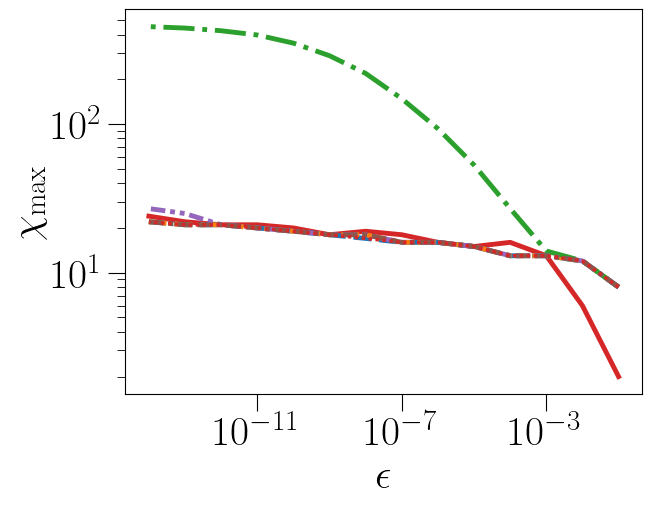

In [9]:
def plot_bonds_t(ax):
    ax.loglog(range_t, read_field(data_t_o, "maxbond"), **STYLE_ITER)
    ax.loglog(range_t, read_field(data_t_o, "maxbond_svd"), **STYLE_O_SVD, zorder=10)
    ax.loglog(range_t, read_field(data_t, "maxbond_basic"), **STYLE_BASIC)
    ax.loglog(range_t, read_field(data_t, "maxbond_rr"), **STYLE_RR)
    ax.loglog(range_t, read_field(data_t, "maxbond_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_t, read_field(data_t, "maxbond_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_t, read_field(data_t, "maxbond_local_30"), **STYLE_LOCAL_30)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

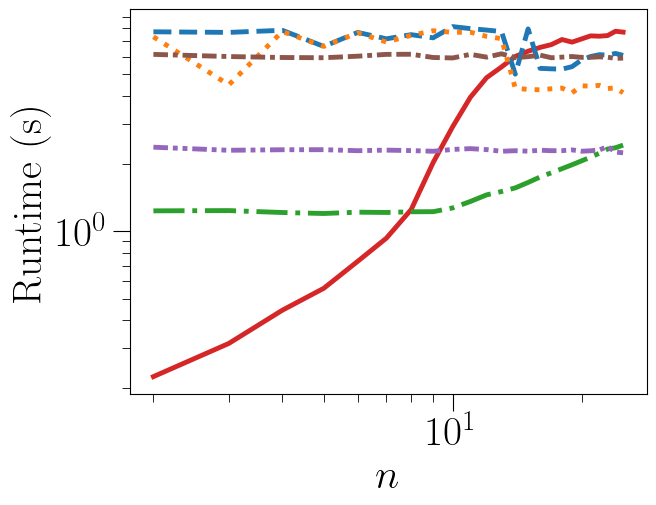

In [10]:
def plot_times_n(ax):
    ax.loglog(range_n, read_field(data_n_o, "time"), **STYLE_ITER)
    ax.loglog(range_n, read_field(data_n, "time_basic"), **STYLE_BASIC)
    ax.loglog(range_n, read_field(data_n, "time_rr"), **STYLE_RR)
    ax.loglog(range_n, read_field(data_n, "time_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_n, read_field(data_n, "time_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_n, read_field(data_n, "time_local_30"), **STYLE_LOCAL_30)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel("Runtime (s)")

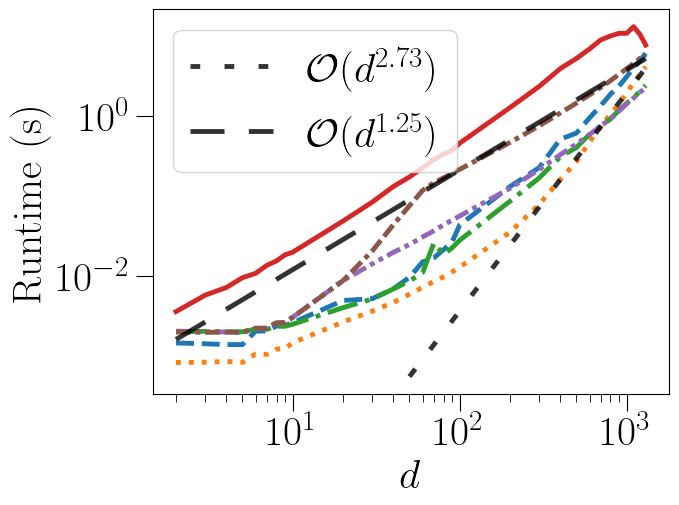

In [11]:
# fmt: off
def plot_times_d(ax):
    ax.loglog(range_d, read_field(data_d_o, "time"), **STYLE_ITER)
    ax.loglog(range_d, read_field(data_d, "time_basic"), **STYLE_BASIC)
    ax.loglog(range_d, read_field(data_d, "time_rr"), **STYLE_RR)
    ax.loglog(range_d, read_field(data_d, "time_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_d, read_field(data_d, "time_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_d, read_field(data_d, "time_local_30"), **STYLE_LOCAL_30)
    # fit_power_law(ax, range_d, read_field(data_d_o, "time"), fit_range=slice(0, 25), plot_range=slice(0, 100), label='d', style=STYLE_FIT_1)
    fit_power_law(ax, range_d, read_field(data_d, "time_rr"), fit_range=slice(19, 100), plot_range=slice(12, 30), label='d', style=STYLE_FIT_2)
    fit_power_law(ax, range_d, read_field(data_d, "time_local_30"), fit_range=slice(13, 30), plot_range=slice(None), label='d', style=STYLE_FIT_1)
    ax.legend()


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_d(ax)
	ax.set_xlabel(r"$d$")
	ax.set_ylabel("Runtime (s)")

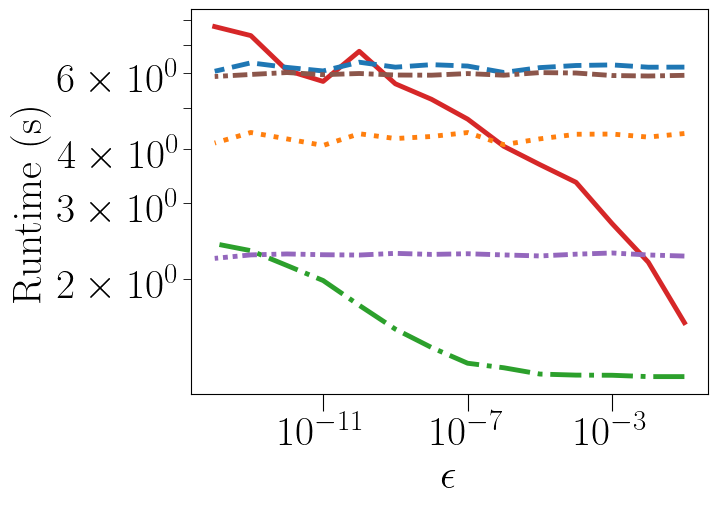

In [12]:
def plot_times_t(ax):
    ax.loglog(range_t, read_field(data_t_o, "time"), **STYLE_ITER)
    ax.loglog(range_t, read_field(data_t, "time_basic"), **STYLE_BASIC)
    ax.loglog(range_t, read_field(data_t, "time_rr"), **STYLE_RR)
    ax.loglog(range_t, read_field(data_t, "time_local_1"), **STYLE_LOCAL_1)
    ax.loglog(range_t, read_field(data_t, "time_local_10"), **STYLE_LOCAL_10)
    ax.loglog(range_t, read_field(data_t, "time_local_30"), **STYLE_LOCAL_30)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("Runtime (s)")

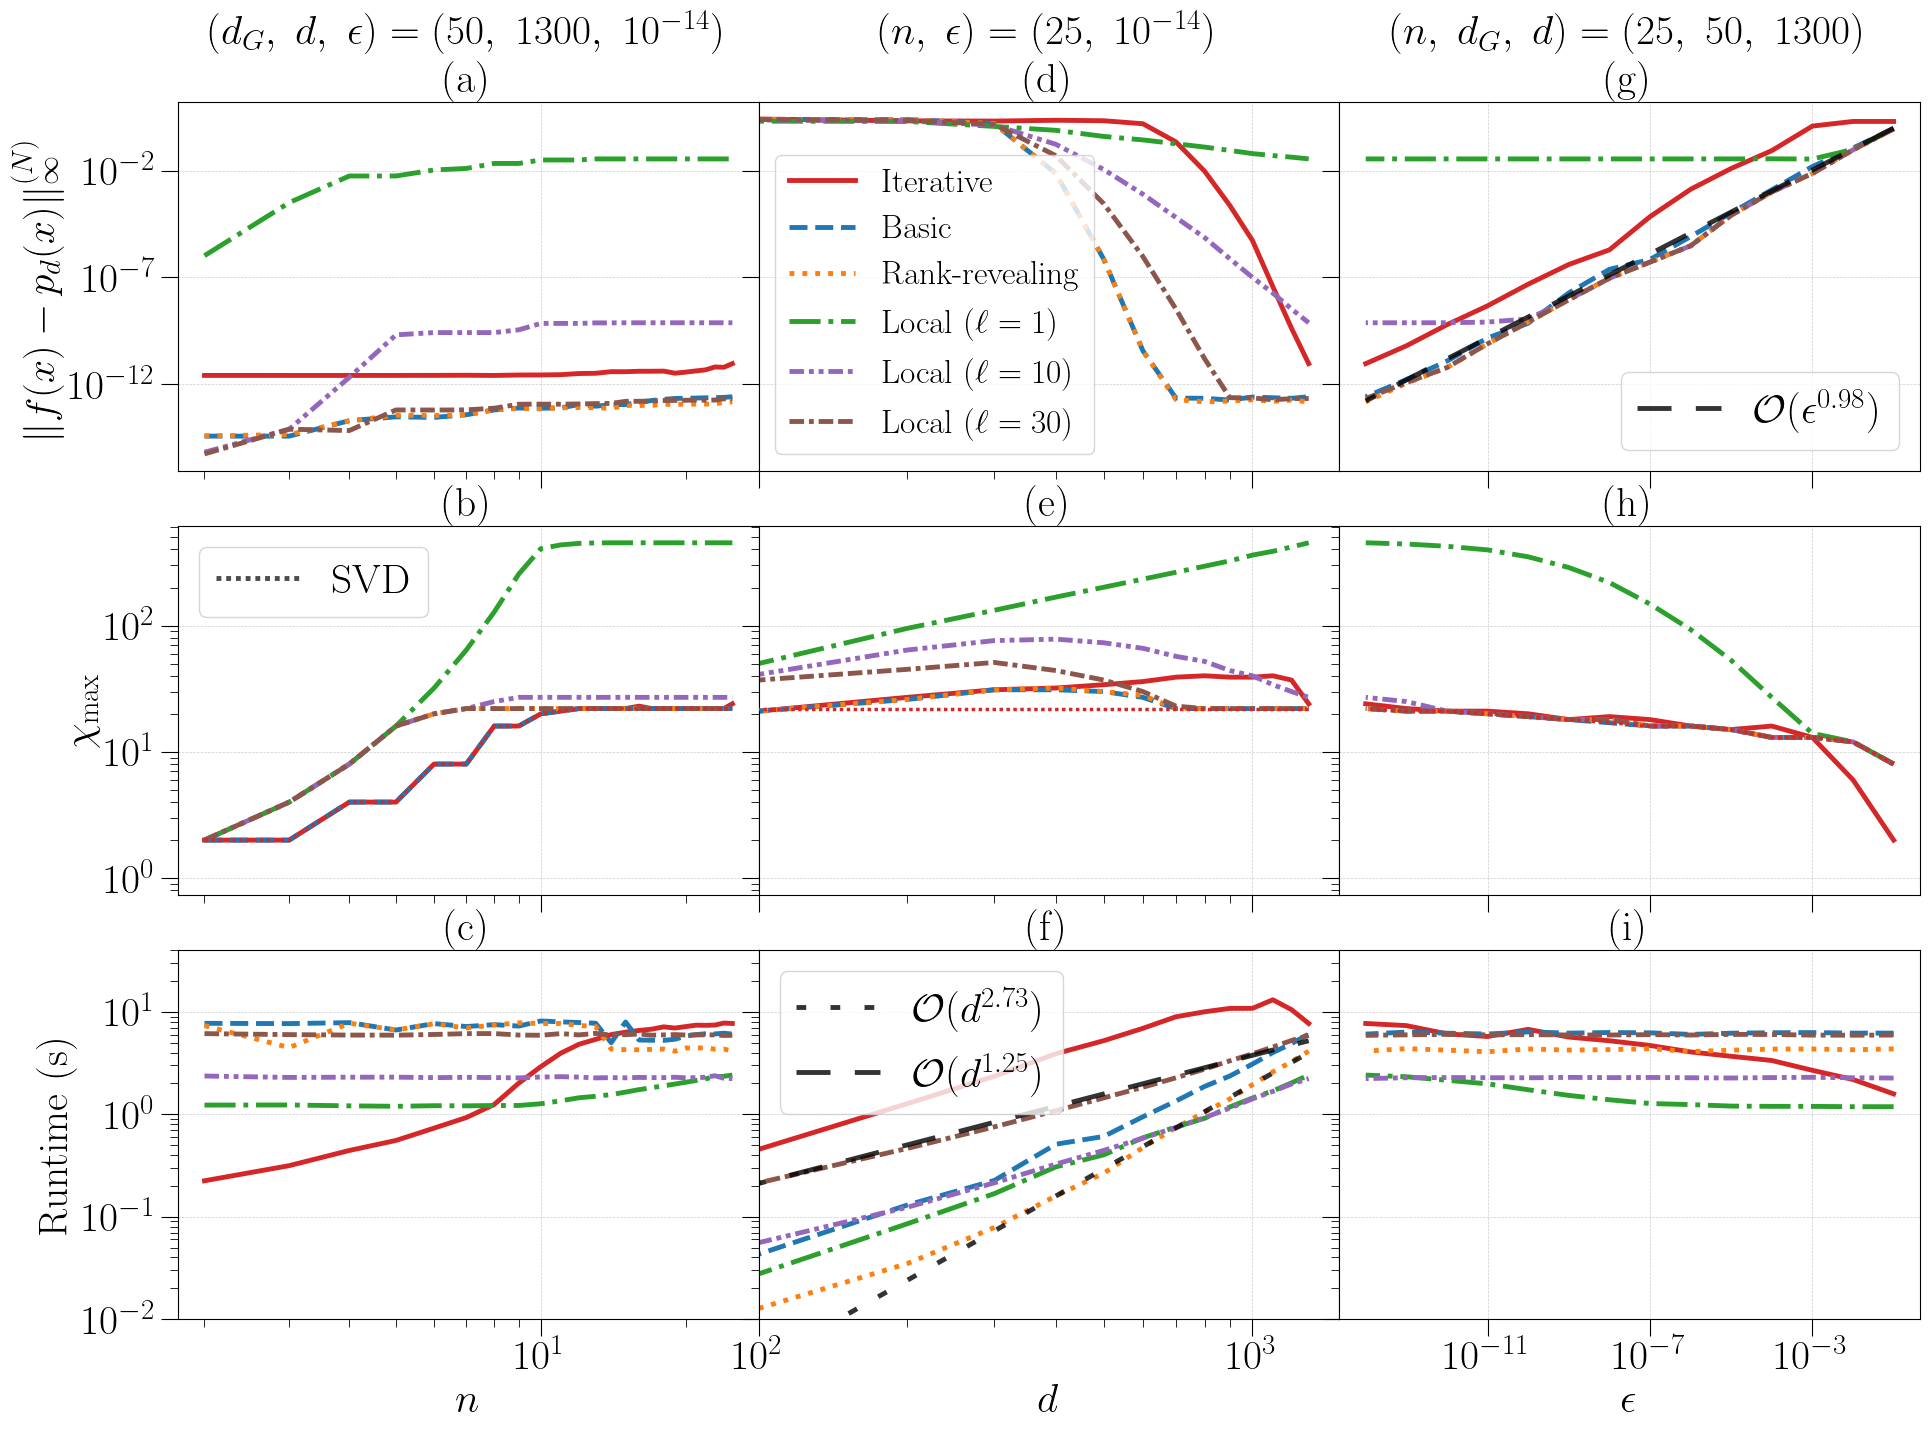

In [13]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(3, 3, sharex='col', sharey='row')

plot_norms_n(axs[0, 0])
plot_norms_d(axs[0, 1])
plot_norms_t(axs[0, 2])
plot_bonds_n(axs[1, 0])
plot_bonds_d(axs[1, 1])
plot_bonds_t(axs[1, 2])
plot_times_n(axs[2, 0])
plot_times_d(axs[2, 1])
plot_times_t(axs[2, 2])

column_labels = [r"$n$", r"$d$", r"$\epsilon$"]
for ax, col in zip(axs[2], column_labels):
    ax.set_xlabel(col)

row_labels = [
    r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$",
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs[:, 0], row_labels):
    ax.set_ylabel(row)

for i, ax in enumerate(axs.flat):
    rows, cols = axs.shape 
    col_wise_index = np.ravel_multi_index(np.unravel_index(i, (rows, cols), order='F'), (cols, rows))
    ax.set_title(f"(" + chr(ord("a") + col_wise_index) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

axs[0, 0].set_title(r"$(d_G, \ d, \ \epsilon) = (50, \ 1300, \ 10^{-14})$" + "\n (a)")
axs[0, 1].set_title(r"$(n, \ \epsilon) = (25, \ 10^{-14})$" + "\n (d)")
axs[0, 2].set_title(r"$(n, \ d_G, \ d) = (25, \ 50, \ 1300)$" + "\n (g)")

for ax in axs[2, :]:  # Loop through the third row
    ax.set_ylim(0.01, 40)

plt.tight_layout()
fig.subplots_adjust(hspace=0.15, wspace=0.0)
plt.savefig("figures/lagrange_1d.pdf", dpi=300, bbox_inches="tight")